In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline


In [2]:
data = pd.read_csv('WildFire_Prediction_Data_Set.csv')
data.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [3]:
print(data.columns)

Index(['NDVI', 'LST', 'BURNED_AREA', 'CLASS'], dtype='object')


In [4]:
data.shape

(1713, 4)

In [5]:
print(list(data.isnull().any()))

[False, False, False, False]


In [6]:
data.describe()

,NDVI,LST,BURNED_AREA
count,1713.000000,1713.000000,1713.000000
mean,0.555665,14622.802073,4.674973
std,0.092847,366.927861,0.583791
min,0.030735,13137.000000,3.000000
25%,0.501276,14406.000000,4.521951
50%,0.565181,14645.750000,4.920635
75%,0.620987,14881.300000,5.000000
max,0.781723,15611.570513,9.000000


In [7]:
#About Target/Cover_Type variable 
data.CLASS.value_counts()

no_fire    1327
fire        386
Name: CLASS, dtype: int64

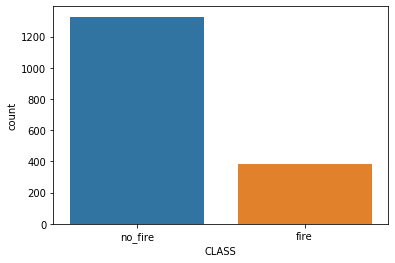

In [8]:
#count plot of target
sb.countplot(x='CLASS', data=data)
plt.show()

In [9]:
x= data[['NDVI', 'LST', 'BURNED_AREA']] 
y= data['CLASS']

In [10]:
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
y= label_encoder_x.fit_transform(y)  

In [11]:
y

array([1, 1, 0, ..., 0, 1, 0])

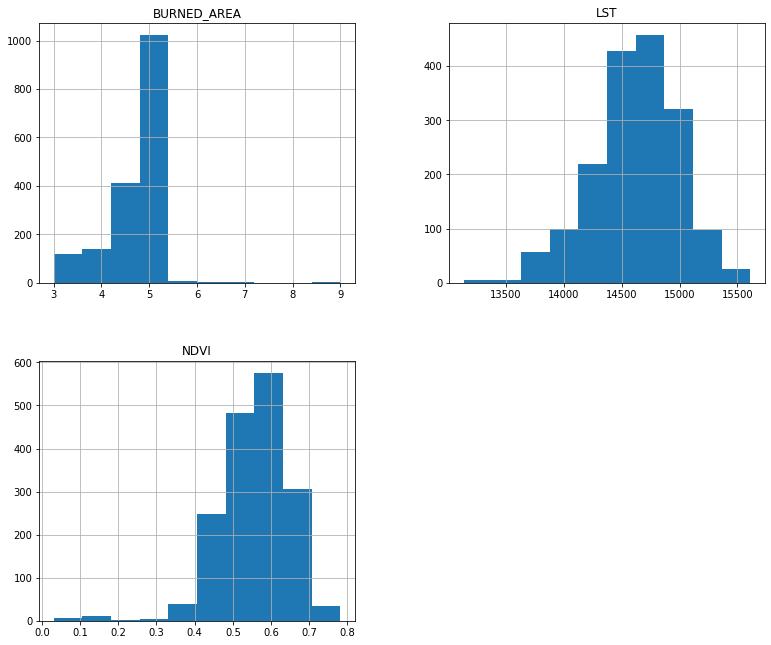

In [12]:
#histogram
data.hist(figsize=(13, 11))
plt.show()

In [13]:
data.head()


,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


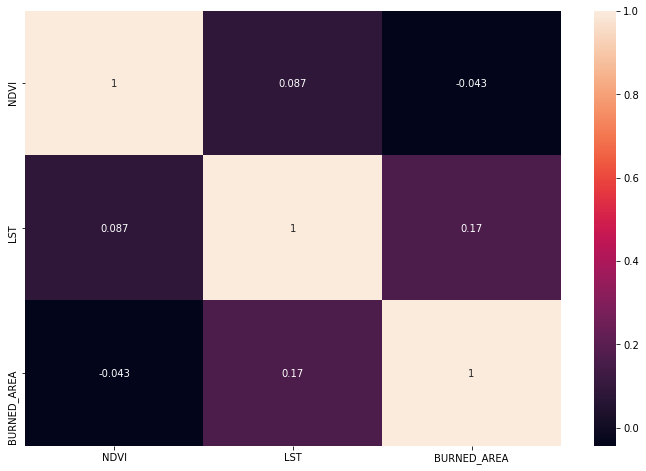

In [14]:
#Correlation
plt.figure(figsize=(12, 8))
corr = data.corr()
sb.heatmap(corr, annot=True)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=0)  
  

In [16]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [17]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
y_pred= classifier.predict(x_test)  

In [19]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8190661478599222

In [21]:
import pickle

pickle.dump(classifier,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))